In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import local modules
import sys
import os
import glob

# Import third-party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Import local modules
import dictionaries as dicts
import functions as funcs

### Exploring CLEARHEADS data ###

For select regions, we want to aggregate the offshore capacity factors and temperature/demand time series.

In [4]:
# Test the new function for extracting the data
df = funcs.extract_offshore_eez_to_df(filepath=os.path.join(dicts.clearheads_dir,
                                                            'EEZ_zones_wp_historical.nc'))

# Look at the first few rows of the dataframe
df

,Spain_0,Norway_1,United Kingdom_2,Ireland_3,Finland_4,Sweden_5,Belgium_6,Netherlands_7,Germany_8,Denmark_9,...,Lithuania_15,Latvia_16,Croatia_17,Romania_18,Slovenia_19,Greece_20,Turkey_21,Malta_22,Albania_23,Bulgaria_24
time_in_hours_from_first_jan_1950,,,,,,,,,,,,,,,,,,,,,
1954-12-31,0.463322,0.589264,0.623401,0.650867,0.495598,0.499534,0.563498,0.585418,0.580573,0.568418,...,0.560168,0.550058,0.319417,0.458919,0.0,0.415682,0.375031,0.283086,0.315496,0.435560
1955-12-31,0.459715,0.598007,0.621849,0.647170,0.504291,0.502630,0.546857,0.573991,0.571843,0.560886,...,0.546895,0.543232,0.310311,0.454759,0.0,0.407107,0.370732,0.276836,0.309318,0.436682
1956-12-31,0.467224,0.597925,0.622789,0.650033,0.502469,0.503108,0.549734,0.576944,0.573917,0.561669,...,0.550026,0.547512,0.311823,0.452855,0.0,0.404924,0.369504,0.278412,0.309153,0.435956
1957-12-31,0.469298,0.596749,0.626987,0.655667,0.500476,0.501898,0.556206,0.585135,0.581586,0.567191,...,0.548471,0.545212,0.309431,0.436166,0.0,0.396006,0.359909,0.273056,0.303062,0.422619
1958-12-31,0.475237,0.592853,0.628979,0.660723,0.498298,0.505758,0.567372,0.592395,0.587245,0.575973,...,0.566914,0.561191,0.312364,0.433776,0.0,0.392068,0.356827,0.277860,0.311315,0.416827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,0.490726,0.603273,0.643905,0.675779,0.510451,0.513196,0.573535,0.603641,0.605228,0.595182,...,0.554758,0.549953,0.318675,0.430224,0.0,0.399450,0.350314,0.277856,0.312737,0.400389
2013-12-31,0.485402,0.601297,0.641389,0.675083,0.514657,0.519326,0.573276,0.602187,0.605833,0.602807,...,0.562830,0.559050,0.311628,0.434296,0.0,0.392239,0.350757,0.269904,0.303107,0.403990
2014-12-31,0.478886,0.604653,0.648024,0.683523,0.519348,0.524931,0.578008,0.610422,0.610774,0.607185,...,0.569053,0.564190,0.313811,0.434491,0.0,0.390280,0.349327,0.268696,0.302761,0.405260


In [5]:
# Rename this dataframe to something more descriptive
eez_df = df

In [3]:
# List the files in the clearheads dir
os.listdir(dicts.clearheads_dir)

['EEZ_zones_wp_historical.nc',
 'NUTS_0_CDD_historical_pop_weighted.nc',
 'NUTS_0_HDD_historical_pop_weighted.nc',
 'NUTS_0_sp_historical.nc',
 'NUTS_0_sp_historical_loc_weighted.nc',
 'NUTS_0_speed100m_historical.nc',
 'NUTS_0_speed10m_historical.nc',
 'NUTS_0_speed10m_historical_pop_weighted.nc',
 'NUTS_0_ssrd_historical.nc',
 'NUTS_0_ssrd_historical_pop_weighted.nc',
 'NUTS_0_t2m_detrended_timeseries_historical.nc',
 'NUTS_0_t2m_detrended_timeseries_historical_pop_weighted.nc',
 'NUTS_0_wp_ofs_sim_0_historical_loc_weighted.nc',
 'NUTS_0_wp_ofs_sim_1_historical_loc_weighted.nc',
 'NUTS_0_wp_ons_sim_0_historical_loc_weighted.nc',
 'NUTS_0_wp_ons_sim_1_historical_loc_weighted.nc',
 'NUTS_1_sp_historical.nc',
 'NUTS_1_speed100m_historical.nc',
 'NUTS_1_speed10m_historical.nc',
 'NUTS_1_ssrd_historical.nc',
 'NUTS_1_t2m_detrended_timeseries_historical.nc',
 'NUTS_1_wp_historical.nc',
 'NUTS_2_sp_historical.nc',
 'NUTS_2_speed100m_historical.nc',
 'NUTS_2_speed10m_historical.nc',
 'NUTS_2

We want the files for:

* Heating degree days at NUTS level (HDD)
* Wind power offshore capacities for the Exclusive Economic Zones (EEZs)

In [4]:
# Find files containing the string 'EEZ_zones_wp_historical' in the clearheads dir
files = glob.glob(os.path.join(dicts.clearheads_dir, '*EEZ_zones_wp_historical*'))

# Print the files
print(files)

# Load the first file
ds = xr.open_dataset(files[0])

# Print the dataset
print(ds)

['/home/users/benhutch/CLEARHEADS_EU_Power_Data/EEZ_zones_wp_historical.nc']
<xarray.Dataset>
Dimensions:                            (time: 622392, NUTS: 25)
Dimensions without coordinates: time, NUTS
Data variables:
    time_in_hours_from_first_jan_1950  (time) float32 ...
    NUTS_keys                          (NUTS) object ...
    timeseries_data                    (NUTS, time) float32 ...


In [5]:
# Print the NUTS_keys
print(ds.NUTS_keys.values)

['ES' 'NO' 'UK' 'IE' 'FI' 'SE' 'BE' 'NL' 'DE' 'DK' 'PO' 'FR' 'IT' 'PT'
 'EE' 'LI' 'LV' 'HR' 'RO' 'SI' 'GR' 'TR' 'MT' 'AL' 'BG']


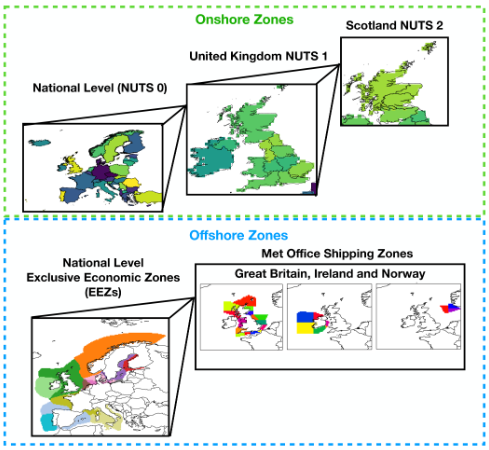

First we want to look at the correlations between the winter (ONDJFM) NAO and capacity factors in the UK EEZ region shown above.

In [6]:
# Extract the data for NUTS_key 'UK'
# Find the index of the NUTS_key 'UK'
nuts_key = 'UK'

# Find the index of the NUTS_key 'UK'
idx = np.where(ds.NUTS_keys.values == nuts_key)[0][0]

print(idx)

# Extract the data for NUTS_key
ds_nuts = ds.isel(NUTS=idx)

2


In [7]:
ds_nuts.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:                            (time: 622392)
Dimensions without coordinates: time
Data variables:
    time_in_hours_from_first_jan_1950  (time) float32 ...
    NUTS_keys                          object 'UK'
    timeseries_data                    (time) float32 ...>

In [8]:
# Turn this xarray dataset into a pandas dataframe
# With two columns: 'time' and 'value'
df = ds_nuts.to_dataframe()

In [9]:
# Convert 'time_in_hours_from_first_jan_1950' column to datetime
df.index = pd.to_datetime(df.index, unit='h', origin='1950-01-01')

# Print the dataframe
print(df)

                     time_in_hours_from_first_jan_1950 NUTS_keys  \
time                                                               
1950-01-01 00:00:00                                0.0        UK   
1950-01-01 01:00:00                                1.0        UK   
1950-01-01 02:00:00                                2.0        UK   
1950-01-01 03:00:00                                3.0        UK   
1950-01-01 04:00:00                                4.0        UK   
...                                                ...       ...   
2020-12-31 19:00:00                           622387.0        UK   
2020-12-31 20:00:00                           622388.0        UK   
2020-12-31 21:00:00                           622389.0        UK   
2020-12-31 22:00:00                           622390.0        UK   
2020-12-31 23:00:00                           622391.0        UK   

                     timeseries_data  
time                                  
1950-01-01 00:00:00         0.514601 

In [10]:
# Collapse the dataframe into monthly means
df_monthly = df.resample('M').mean()

In [11]:
df_monthly

,time_in_hours_from_first_jan_1950,timeseries_data
time,,
1950-01-31,371.5,0.655063
1950-02-28,1079.5,0.706336
1950-03-31,1787.5,0.596479
1950-04-30,2519.5,0.619591
1950-05-31,3251.5,0.418854
...,...,...
2020-08-31,619091.5,0.416750
2020-09-30,619823.5,0.534869
2020-10-31,620555.5,0.611318


In [12]:
# Select only the months Oct, Nov, Dec, Jan, Feb, Mar
df_ondjfm = df_monthly[df_monthly.index.month.isin([10, 11, 12, 1, 2, 3])]

In [13]:
df_ondjfm

,time_in_hours_from_first_jan_1950,timeseries_data
time,,
1950-01-31,371.5,0.655063
1950-02-28,1079.5,0.706336
1950-03-31,1787.5,0.596479
1950-10-31,6923.5,0.627670
1950-11-30,7655.5,0.613428
...,...,...
2020-02-29,614699.5,0.767405
2020-03-31,615419.5,0.664999
2020-10-31,620555.5,0.611318


In [14]:
# Shift the time index back by 3 months
df_ondjfm.index = df_ondjfm.index - pd.DateOffset(months=3)

In [15]:
df_ondjfm

,time_in_hours_from_first_jan_1950,timeseries_data
time,,
1949-10-31,371.5,0.655063
1949-11-28,1079.5,0.706336
1949-12-31,1787.5,0.596479
1950-07-31,6923.5,0.627670
1950-08-30,7655.5,0.613428
...,...,...
2019-11-29,614699.5,0.767405
2019-12-31,615419.5,0.664999
2020-07-31,620555.5,0.611318


In [16]:
# Throw away the first 3 months and the last 3 months
df_ondjfm = df_ondjfm.iloc[3:-3]

In [17]:
# Take the annual mean
df_annual = df_ondjfm.resample('A').mean()

In [18]:
df_annual

,time_in_hours_from_first_jan_1950,timeseries_data
time,,
1950-12-31,8747.5,0.603040
1951-12-31,17513.5,0.638050
1952-12-31,26291.5,0.592291
1953-12-31,35051.5,0.621326
1954-12-31,43811.5,0.642947
...,...,...
2015-12-31,578537.5,0.667133
2016-12-31,587315.5,0.612864
2017-12-31,596075.5,0.658691


In [19]:
# Take a centred 8-year running mean
df_running = df_annual.rolling(8, center=True).mean()

df_running

,time_in_hours_from_first_jan_1950,timeseries_data
time,,
1950-12-31,NaN,NaN
1951-12-31,NaN,NaN
1952-12-31,NaN,NaN
1953-12-31,NaN,NaN
1954-12-31,39433.0,0.623401
...,...,...
2015-12-31,574159.0,0.654180
2016-12-31,582925.0,0.654373
2017-12-31,NaN,NaN


In [20]:
# Throw away the years containing NaNs
df_running = df_running.dropna()

In [21]:
df_running

,time_in_hours_from_first_jan_1950,timeseries_data
time,,
1954-12-31,39433.0,0.623401
1955-12-31,48199.0,0.621849
1956-12-31,56965.0,0.622789
1957-12-31,65731.0,0.626987
1958-12-31,74497.0,0.628979
...,...,...
2012-12-31,547861.0,0.643905
2013-12-31,556627.0,0.641389
2014-12-31,565393.0,0.648024


While MSLP data from 1950 is downloading, we'll work with the data from 1960 instead.

In [6]:
# Use this file
# adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc
# in ~/ERA5/
# Load the dataset
era5_data_path = "~/ERA5/adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc"

# Load the data into chunks
ds_era5 = xr.open_mfdataset(era5_data_path, 
                            combine='by_coords',
                            parallel=True,
                            chunks={'time': 100,
                                    'latitude': 100,
                                     'longitude': 100})["msl"] # for mean sea level pressure

# Combine the first two expver variables
obs_msl = ds_era5.sel(expver=1).combine_first(ds_era5.sel(expver=5))

obs_msl

<xarray.DataArray 'msl' (time: 775, latitude: 721, longitude: 1440)>
dask.array<where, shape=(775, 721, 1440), dtype=float32, chunksize=(100, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-07-01
Attributes:
    units:          Pa
    long_name:      Mean sea level pressure
    standard_name:  air_pressure_at_mean_sea_level

In [7]:
# Constrain obs to October, November, December, January, February, March
obs_msl = obs_msl.sel(time=obs_msl.time.dt.month.isin([10, 11, 12, 1, 2, 3]))

In [8]:
# Shift the time index back by 3 months
obs_msl_shifted = obs_msl.shift(time=-3)

In [9]:
obs_msl_shifted

<xarray.DataArray 'msl' (time: 387, latitude: 721, longitude: 1440)>
dask.array<rechunk-merge, shape=(387, 721, 1440), dtype=float32, chunksize=(51, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-03-01
Attributes:
    units:          Pa
    long_name:      Mean sea level pressure
    standard_name:  air_pressure_at_mean_sea_level

In [10]:
# Take annual means
obs_msl_annual = obs_msl_shifted.resample(time='Y').mean()

In [11]:
# Throw away years 1959, 2021, 2022 and 2023
obs_msl_annual = obs_msl_annual.sel(time=slice('1960', '2019'))

obs_msl_annual

<xarray.DataArray 'msl' (time: 60, latitude: 721, longitude: 1440)>
dask.array<getitem, shape=(60, 721, 1440), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2019-12-31
Attributes:
    units:          Pa
    long_name:      Mean sea level pressure
    standard_name:  air_pressure_at_mean_sea_level

In [12]:
# Remove the climatology
obs_msl_anomaly = obs_msl_annual - obs_msl_annual.mean(dim='time')

In [13]:
# Extract the lats and lons of the azores
lat1, lat2 = dicts.era5_azores['lat1'], dicts.era5_azores['lat2']
lon1, lon2 = dicts.era5_azores['lon1'], dicts.era5_azores['lon2']

# Calculate the mean for the azores gridbox
obs_msl_anomaly_azores = obs_msl_anomaly.sel(latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)).mean(dim=['latitude', 'longitude'])

In [14]:
# Same for iceland
lat1, lat2 = dicts.era5_iceland['lat1'], dicts.era5_iceland['lat2']
lon1, lon2 = dicts.era5_iceland['lon1'], dicts.era5_iceland['lon2']

# Calculate the mean for the iceland gridbox
obs_msl_anomaly_iceland = obs_msl_anomaly.sel(latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)).mean(dim=['latitude', 'longitude'])

In [15]:
# Print the values
print(obs_msl_anomaly_iceland.compute().values)

[-6.19164200e+01  3.19822083e+02  6.26210754e+02  2.13155502e+02
  5.33107239e+02  7.05365051e+02  7.21623917e+01  1.74377838e+02
  9.76438904e+02  2.16635712e+02  3.35233093e+02 -1.52428223e+02
 -4.05454437e+02 -5.61735511e-01 -1.26718224e+02 -2.85071106e+02
  3.72561981e+02 -7.37327347e+01  1.15196808e+02 -3.89581909e+01
  3.00233185e+02  1.12719505e+02 -4.68678528e+02 -5.93212280e+01
  2.12823715e+02  3.61150940e+02 -2.56491638e+02  1.86482788e+02
 -5.74619080e+02 -7.37694641e+02 -8.12044678e+01 -2.91800873e+02
 -5.72302795e+02 -3.12318115e+02 -5.54424744e+02  5.98776062e+02
 -7.16241684e+01  6.87529984e+01 -2.83813202e+02 -2.54232376e+02
  2.22972031e+02 -8.06411133e+01  1.30879364e+02  2.15507370e+02
  2.41819077e+02  3.21932587e+02 -2.66400208e+02 -2.65425537e+02
 -1.02235901e+02  7.09418701e+02  3.41398285e+02 -5.73745300e+02
  5.58819885e+02 -6.01948975e+02 -6.62328613e+02 -4.01034576e+02
 -1.47984589e+02  2.78262749e+01 -6.23808403e+01 -4.44286255e+02]


In [16]:
# Calculate the NAO index (azores - iceland)
nao_index = obs_msl_anomaly_azores - obs_msl_anomaly_iceland

In [17]:
# EXtract the time series
nao_index_time = nao_index.time.values

# Extract the values
nao_index_values = nao_index.values

# Create a dataframe
nao_df = pd.DataFrame({'time': nao_index_time, 'value': nao_index_values})

In [18]:
# Take a centred 8-year running mean
nao_running = nao_df.set_index('time').rolling(8, center=True).mean()

In [19]:
nao_running

,value
time,
1960-12-31,NaN
1961-12-31,NaN
1962-12-31,NaN
1963-12-31,NaN
1964-12-31,-470.643861
1965-12-31,-700.141582
1966-12-31,-678.611430
1967-12-31,-607.385234
1968-12-31,-488.875705


In [20]:
# Drop the NaNs
nao_running = nao_running.dropna()

In [22]:
# Combine the two dataframes into one, using the index of the first
eez_df = eez_df.join(nao_running, how='inner')

eez_df

,Spain_0,Norway_1,United Kingdom_2,Ireland_3,Finland_4,Sweden_5,Belgium_6,Netherlands_7,Germany_8,Denmark_9,...,Latvia_16,Croatia_17,Romania_18,Slovenia_19,Greece_20,Turkey_21,Malta_22,Albania_23,Bulgaria_24,value
1964-12-31,0.484011,0.588192,0.625989,0.680295,0.506070,0.504670,0.567749,0.583326,0.572031,0.562861,...,0.551736,0.317215,0.441299,0.0,0.383178,0.353909,0.277367,0.309614,0.418305,-470.643861
1965-12-31,0.485404,0.587854,0.623884,0.675909,0.505175,0.500834,0.564292,0.580379,0.567321,0.556950,...,0.552177,0.316208,0.445542,0.0,0.388816,0.358320,0.278524,0.310649,0.426743,-700.141582
1966-12-31,0.485558,0.585045,0.623956,0.674387,0.496668,0.491019,0.559140,0.577548,0.563846,0.549513,...,0.537800,0.312884,0.448921,0.0,0.392327,0.360686,0.279371,0.312071,0.431473,-678.611430
1967-12-31,0.481957,0.587782,0.627295,0.673570,0.501746,0.498297,0.565502,0.588240,0.576535,0.558334,...,0.546084,0.307474,0.447668,0.0,0.389807,0.358890,0.271839,0.307856,0.429846,-607.385234
1968-12-31,0.480453,0.593806,0.629429,0.669331,0.508093,0.503686,0.566467,0.591715,0.583839,0.569484,...,0.551089,0.308064,0.452348,0.0,0.391516,0.358720,0.274820,0.311600,0.434270,-488.875705
1969-12-31,0.479308,0.596545,0.632529,0.669339,0.507176,0.502812,0.559584,0.589325,0.585457,0.574637,...,0.550357,0.303824,0.450215,0.0,0.391035,0.359215,0.268669,0.306626,0.433071,-343.737849
1970-12-31,0.471208,0.604410,0.633036,0.663770,0.511924,0.506810,0.559825,0.591133,0.589240,0.578829,...,0.548123,0.303514,0.451634,0.0,0.389477,0.356709,0.265259,0.302343,0.434992,-209.533796
1971-12-31,0.464521,0.600180,0.629490,0.661817,0.509798,0.508777,0.560630,0.588997,0.587965,0.578268,...,0.552981,0.302311,0.450471,0.0,0.390888,0.357817,0.262860,0.299072,0.434915,-197.388946
1972-12-31,0.459356,0.601871,0.629018,0.660132,0.509214,0.506293,0.549163,0.584647,0.583611,0.570343,...,0.552252,0.299712,0.449271,0.0,0.389977,0.357566,0.258505,0.294513,0.434485,-147.229394
1973-12-31,0.463380,0.601826,0.627399,0.656625,0.512376,0.511089,0.548515,0.582105,0.582596,0.570671,...,0.554214,0.304667,0.445968,0.0,0.387333,0.354671,0.262653,0.299943,0.429336,0.709258


In [23]:
# Rename the value column as 'NAO anomaly (Pa)'
eez_df = eez_df.rename(columns={'value': 'NAO anomaly (Pa)'})

In [24]:
from scipy.stats import pearsonr
# Create a new dataframe with columns for:
# 'region' - e.g. Netherlands_7
# 'correlation' - the correlation between the NAO and the offshore wind CFs
# 'p-value' - the p-value of the correlation
# Set up the dataframe
correlation_df = pd.DataFrame(columns=['region', 'correlation', 'p-value'])

# Loop over the regions
for region in eez_df.columns[:-1]:
    # Calculate the correlation
    corr, p = pearsonr(eez_df[region], eez_df['NAO anomaly (Pa)'])

    # Append to the dataframe
    correlation_df = correlation_df.append({'region': region, 'correlation': corr, 'p-value': p}, ignore_index=True)

# Print the dataframe
correlation_df

/tmp/ipykernel_30053/3738288836.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'region': region, 'correlation': corr, 'p-value': p}, ignore_index=True)
/tmp/ipykernel_30053/3738288836.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'region': region, 'correlation': corr, 'p-value': p}, ignore_index=True)
/tmp/ipykernel_30053/3738288836.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'region': region, 'correlation': corr, 'p-value': p}, ignore_index=True)
/tmp/ipykernel_30053/3738288836.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

,region,correlation,p-value
0,Spain_0,-0.400091,2.994297e-03
1,Norway_1,0.780602,5.487235e-12
2,United Kingdom_2,0.743837,1.752723e-10
3,Ireland_3,0.558703,1.375379e-05
4,Finland_4,0.764267,2.762187e-11
5,Sweden_5,0.855943,3.174566e-16
6,Belgium_6,0.346083,1.113533e-02
7,Netherlands_7,0.748949,1.122375e-10
8,Germany_8,0.869277,3.154159e-17
9,Denmark_9,0.912152,2.129502e-21


In [25]:
# Set up a filename for the correlation dataframe
folder = "/home/users/benhutch/energy-met-corr/corrs/"

# If the folder doesn't exist, create it
if not os.path.exists(folder):
    os.makedirs(folder)

# Save the dataframe to a csv file
correlation_df.to_csv(os.path.join(folder, 'offshore_wind_NAO_correlations_EEZ.csv'), index=False)

Text(0.5, 1.0, 'UK offshore CFs and NAO anomaly')

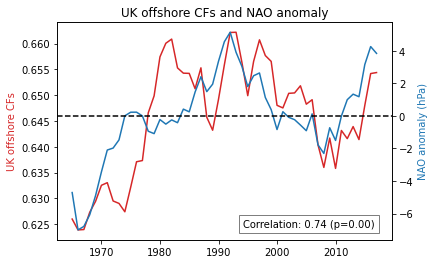

In [45]:
from scipy.stats import pearsonr

# With time as the x-axis, plot the two time series with separate y-axes
# Plot 'time' index on the x-axis
# Plot 'timeseries_data' and 'value' each with their own y-axis
fig, ax1 = plt.subplots()

# Plot the first time series
color = 'tab:red'

# Set the y-axis label
ax1.set_ylabel('UK offshore CFs', color=color)

# Plot the first time series
ax1.plot(df_running.index, df_running['timeseries_data'], color=color)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second time series
color = 'tab:blue'

# Set the y-axis label
ax2.set_ylabel('NAO anomaly (hPa)', color=color)

# Plot the second time series
ax2.plot(df_running.index, df_running['value']/100, color=color)

# Calculate the correlation coefficient
correlation, p = pearsonr(df_running['timeseries_data'], df_running['value'])

# Include the correlation coefficient in the plot
ax1.text(0.95, 0.05, f'Correlation: {correlation:.2f} (p={p:.2f})',
            transform=ax1.transAxes,
            fontsize=10, verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5))

# Include a zero line for the NAO
ax2.axhline(0, color='black', linestyle='--')

# Set the title
plt.title('UK offshore CFs and NAO anomaly')

### How well does NAO correlate in all zones? ###

Table of values of correlation for each of these.

In [ ]:
# Create a new dataframe
# With columns 'NUTS keys', 'EEZ region', '8yrRM corr(NAO, CFs)', '8yrRM p-value(NAO, CFs)'
df_corr = pd.DataFrame({'NUTS keys': [nuts_key],
                        'EEZ region': ['UK'],
                        '8yrRM corr(NAO, CFs)': [correlation],
                        '8yrRM p-value(NAO, CFs)': [p]})

# Populate the dataframe with the nuts keys and eez regions
# op

In [8]:
# Find the files containing NUTS_0_HDD_historical_pop_weighted
files = glob.glob(os.path.join(dicts.clearheads_dir, '*NUTS_0_HDD_historical_pop_weighted*'))

# Print the files
print(files)

# Load the first file
ds = xr.open_dataset(files[0])

# Print the dataset
print(ds)

['/home/users/benhutch/CLEARHEADS_EU_Power_Data/NUTS_0_HDD_historical_pop_weighted.nc']
<xarray.Dataset>
Dimensions:                            (time: 25933, NUTS: 38)
Dimensions without coordinates: time, NUTS
Data variables:
    time_in_hours_from_first_jan_1950  (time) float32 ...
    NUTS_keys                          (NUTS) object ...
    timeseries_data                    (NUTS, time) float32 ...


In [9]:
# Print the values of the NUTS_keys
print(ds.NUTS_keys.values)

['AT' 'AL' 'BY' 'BE' 'BA' 'BG' 'HR' 'CZ' 'DK' 'EE' 'FI' 'FR' 'DE' 'GR'
 'HU' 'IE' 'IT' 'XK' 'LV' 'LT' 'LU' 'MK' 'MD' 'ME' 'NL' 'NO' 'PL' 'PT'
 'RO' 'RS' 'SK' 'SI' 'ES' 'SE' 'CH' 'TR' 'UA' 'UK']
